In [1]:
import numpy as np


#### Used the tensorflow You can multiply the array

In [2]:
import tensorflow as tf


/Users/biyichen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
arr1 = np.array([(1,2,3),(4,5,6)])
arr2 = np.array([(7,8,9),(10,11,12)])
arr3 = tf.multiply(arr1,arr2)

In [4]:
print(arr3)

Tensor("Mul:0", shape=(2, 3), dtype=int64)


In [5]:
sess = tf.Session()

In [6]:
tensor = sess.run(arr3)

In [7]:
print(tensor)

[[ 7 16 27]
 [40 55 72]]


In [8]:
import matplotlib.image as img

In [9]:
myfile = "/Users/biyichen/Desktop/harry-meghan-15.jpg"

In [10]:
myimage = img.imread(myfile)

In [11]:
print(myimage.ndim)

3


In [12]:
print(myimage.shape)

(630, 1200, 3)


#### From the results of the run, you should see that this 3D image has a width of 150, a height of 150, and a color depth of 3.

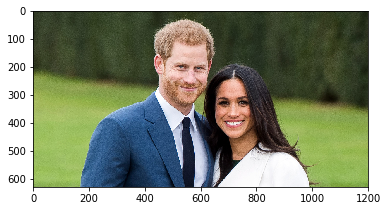

In [14]:
import matplotlib.pyplot as plot
plot.imshow(myimage)
plot.show()

#### Change images with TensorFlow. First, specify the image to be processed and initialize the TensorFlow variable value.
#### Then call the transpose function transform, which is used to flip the 0 and 1 axes of the input mesh.

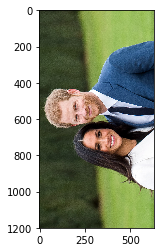

In [24]:
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plot
myfile = "/Users/biyichen/Desktop/harry-meghan-15.jpg"
myimage = img.imread(myfile)
image = tf.Variable(myimage,name='image')
vars = tf.global_variables_initializer()
sess = tf.Session()
flipped = tf.transpose(image, perm=[1,0,2])
sess.run(vars)
result=sess.run(flipped)
plot.imshow(result)
plot.show()

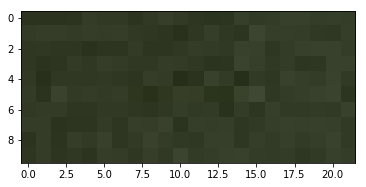

In [40]:
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plot
myfile = "/Users/biyichen/Desktop/harry-meghan-15.jpg"
myimage = img.imread(myfile)
slice = tf.placeholder("int32",[None,None,3])
cropped = tf.slice(myimage,[10,1,0],[10,22,-1])
sess = tf.Session()
result = sess.run(cropped, feed_dict={slice: myimage})
plot.imshow(result)
plot.show()

In [69]:
import tensorflow as tf
import numpy as np

ph = tf.placeholder(shape=[None,3], dtype=tf.int32)

# look the -1 in the first position
x = tf.slice(ph, [1, 1], [1, 1])

input = [
    [[11, 12, 13], [14, 15, 16]],
    [[21, 22, 23], [24, 25, 26]],
    [[31, 32, 33], [34, 35, 36]],
    [[41, 42, 43], [44, 45, 46]],
    [[51, 52, 53], [54, 55, 56]],
    ]
s1 = tf.slice(input, [1, 0, 0], [1, 1, 3])
tf.global_variables_initializer()
with tf.Session() as s:
    print (s.run(s1))

[[[21 22 23]]]


In [79]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Read google fashion image classification data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Converted pixel value to floating point number
train_images = train_images / 255.0
test_images = test_images / 255.0
# Building a dataset import function using a NumPy array
train_input_fn = tf.estimator.inputs.numpy_input_fn(
   x={"pixels": train_images}, y=train_labels.astype(np.int32), shuffle=True)
test_input_fn = tf.estimator.inputs.numpy_input_fn(
   x={"pixels": test_images}, y=test_labels.astype(np.int32), shuffle=False)
# Define feature columns (numeric_column is numeric)
feature_columns = [tf.feature_column.numeric_column("pixels", shape=[28, 28])]
# Define a deep learning neural network classifier, create a new folder estimator_test to save checkpoints
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns, hidden_units=[128, 128], 
    optimizer=tf.train.AdamOptimizer(1e-4), n_classes=10, model_dir = './estimator_test')
classifier.train(input_fn=train_input_fn, steps=20000) # learning
model_eval = classifier.evaluate(input_fn=test_input_fn) # Evaluation

4423680/4422102 [==============================] - 0s 0us/step
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './estimator_test', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1827cc53c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving

In [80]:
import tensorflow as tf
from tensorflow import keras
# Read google fashion image classification data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Converted pixel value to floating point number
train_images = train_images / 255.0
test_images = test_images / 255.0
# Building the input layer - hidden layer - output layer
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Set optimization algorithm, loss function
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
# Start learning（epochs=5）
model.fit(train_images, train_labels, epochs=5)
# Model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
# prediction
predictions = model.predict(test_images)
# Save mode and mode parameters
model.save_weights('./keras_test') # Create a new folder in the current path
model.save('my_model.h5')

Epoch 1/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.4971 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.3747 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3396 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.3119 - acc: 0.8862
Epoch 5/5
10000/10000 [==============================] - 0s 44us/step
Test accuracy: 0.8777
